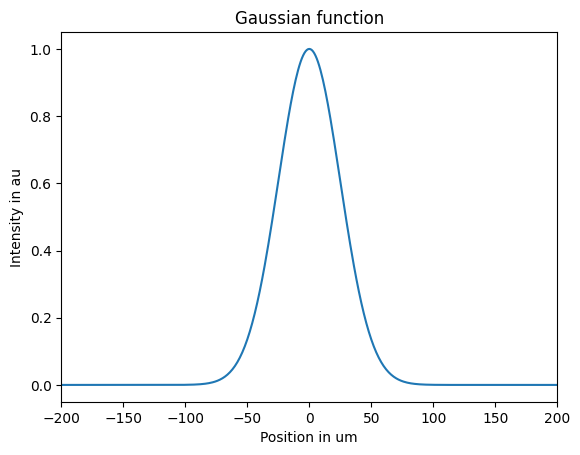

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# copied from above 

def propTF(uin_V_m, L_m, lambda_m, z_m):
    M = uin_V_m.size        # number of samples (grid points)
    dx_m = L_m/M            # grid spacing
    k_1_m = 2*np.pi/lambda_m # wavenumber

    # Frequency coordinates
    fx_1_m = np.linspace(-1/(2*dx_m), 1/(2*dx_m) - (1/L_m), M)
    
    # Transfer function for Fresnel propagation
    H = np.exp(-1j * np.pi * lambda_m * z_m * (fx_1_m**2))
    H = np.fft.fftshift(H)

    # Fourier transform input field
    Uin_V_m = np.fft.fft(np.fft.fftshift(uin_V_m))

    # Multiply in Fourier space
    Uout_V_m = H * Uin_V_m

    # Inverse FFT → propagated field
    uout_V_m = np.fft.ifftshift(np.fft.ifft(Uout_V_m))
    return uout_V_m


dx_m = 1e-6 #grid size, m:meter
Dx_m = 1 #screen size
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(Dx_m/dx_m)+1)

x_mean_m = 0.0 #centered on...
x_std_m = 25e-6 #widthofgaussian
g = np.exp(-(x_m - x_mean_m)**2/(2*(x_std_m**2))) # gaussian intensity distribution 
plt.plot(x_m*1e6, g)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au") #arbitrary units
plt.title("Gaussian function")
plt.xlim(-200, 200)
plt.show()

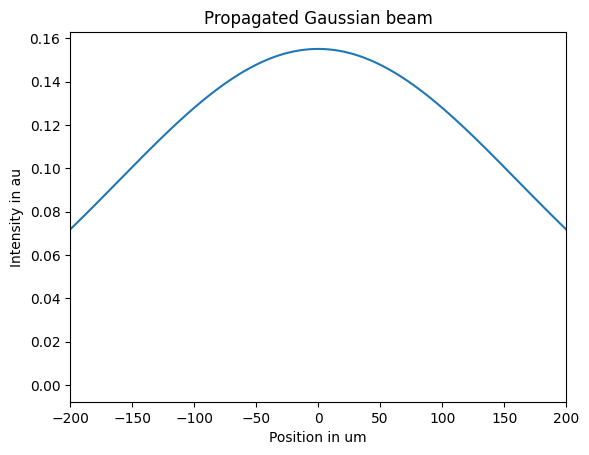

In [9]:
#initial beam electric field

wavelength_m = 500e-9 #wavelength, m
zp_m = 100e-3 #propagation distance, m

E0 = np.sqrt(g) # initial field amplitude squared equals the Gaussian intensity defined earlier 
Ep = propTF(E0, Dx_m, wavelength_m, zp_m) # propTF propagates that field forward by a distance zp_m 

Ip = np.abs(Ep)**2 # intensity 

plt.plot(x_m*1e6, Ip)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au") #arbitrary units
plt.title("Propagated Gaussian beam")
plt.xlim(-200, 200)
plt.show()


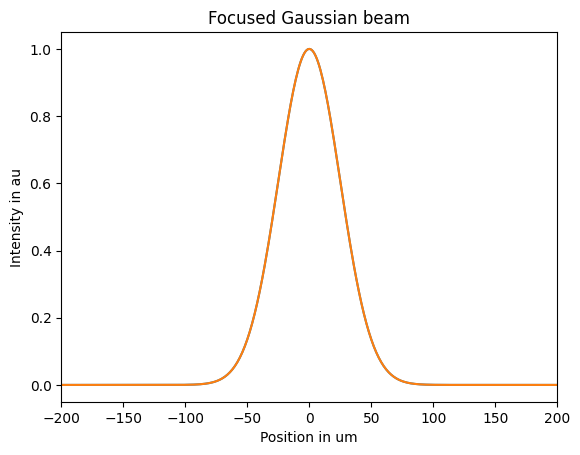

0.1


In [16]:
# Lens equation: 1/f_m = 1/p_m+1/q_m
# Lens phase: exp(i*(2*pi/lambda_m)/(2*f_m)*x_m^2)



p_m = zp_m 
q_m = zp_m 
f_m = 1/(1/(p_m) + (1/q_m)) #f_m = focal length, p_m = z_pm

lens = np.exp(-1j*(2*np.pi/wavelength_m)/(2*f_m)*x_m**2)

Ef = propTF(Ep*lens, Dx_m, wavelength_m, zp_m) 

plt.plot(x_m*1e6, np.abs(Ef)**2)
plt.plot(x_m*1e6, np.abs(E0)**2)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Focused Gaussian beam")
plt.xlim(-200, 200)
plt.show()

print(zp_m)

<function matplotlib.pyplot.show(close=None, block=None)>

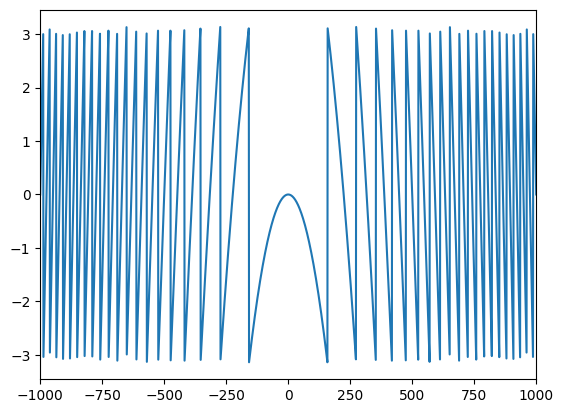

In [14]:
plt.plot(x_m*1e6, np.angle(lens))
plt.xlim(-1000,1000)
plt.show

In [ ]:
# focus at various distances (q and p diff)
# how beam size decr at diff q's

# zp now q
# ratio, initial vs diff beam sizes 
# imshow plot but both sides of lens (loop before & after lens)


# Lens equation: 1/f_m = 1/p_m+1/q_m
# Lens phase: exp(i*(2*pi/lambda_m)/(2*f_m)*x_m^2)



p_m = zp_m 
q_m = zp_m 
f_m = 1/(1/(p_m) + (1/q_m)) #f_m = focal length, p_m = z_pm

lens = np.exp(-1j*(2*np.pi/wavelength_m)/(2*f_m)*x_m**2)

Ef = propTF(Ep*lens, Dx_m, wavelength_m, q_m) 

plt.plot(x_m*1e6, np.abs(Ef)**2)
plt.plot(x_m*1e6, np.abs(E0)**2)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au")
plt.title("Focused Gaussian beam")
plt.xlim(-200, 200)
plt.show()

print(zp_m)